# RAOP Final Notebook Sybil Worksheet

Shane Kramer, Monali Narayanaswami, Sybil Santos-Burgan, Jose Torres

https://github.com/ssburgan/w207_final_project

Data can be pulled from: https://www.kaggle.com/c/random-acts-of-pizza

Semester: Spring 2022

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
import re
import numpy as np
import pandas as pd

# General libraries.
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import *
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import json 
import pandas as pd 
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssbur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Data and Performing Basic Data Checks

In [2]:
# Read JSON file from data folder
#Load training data
train_data = pd.read_json('../data/random-acts-of-pizza/train.json')

# Load test data
test_data = pd.read_json('../data/random-acts-of-pizza/test.json') 

train_data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


In [3]:
train_data.describe()

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4.040000e+03,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03,4.040000e+03,4.040000e+03
mean,2.424505,6.180446,1.005868e+08,2.871040,254.586579,757.692720,16.417034,518.993205,115.098267,289.425743,...,41.151733,0.063614,1.239109,18.076733,1160.079950,2720.342079,3.743236e+03,7.788069e+03,1.342829e+09,1.342826e+09
std,3.023101,10.746320,3.558566e+08,4.723339,303.275730,333.035728,70.651428,267.872623,193.318968,357.416133,...,80.798543,0.325773,0.603083,21.736465,3718.365515,6264.378878,2.583816e+04,3.916741e+04,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,45.291562,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-173.000000,-173.000000,0.000000e+00,0.000000e+00,1.297723e+09,1.297723e+09
25%,1.000000,2.000000,0.000000e+00,0.000000,3.473168,522.248455,0.000000,279.009051,0.000000,8.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,22.000000,9.000000e+00,5.200000e+01,1.320469e+09,1.320466e+09
50%,2.000000,4.000000,0.000000e+00,1.000000,157.067170,753.270874,0.000000,528.781939,24.000000,114.000000,...,13.000000,0.000000,1.000000,11.000000,174.500000,708.000000,3.510000e+02,1.283500e+03,1.342565e+09,1.342561e+09
75%,3.000000,7.000000,0.000000e+00,4.000000,390.092653,900.349838,0.000000,776.226670,140.250000,479.000000,...,46.000000,0.000000,1.000000,27.000000,1163.750000,3304.000000,2.303750e+03,6.829000e+03,1.364618e+09,1.364614e+09
max,47.000000,345.000000,1.380909e+09,61.000000,2809.750787,2879.276319,785.457685,1025.407593,994.000000,1000.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1.286864e+06,2.046482e+06,1.381552e+09,1.381523e+09


(4040, 32)
Baseline accuracy  0.24603960396039604


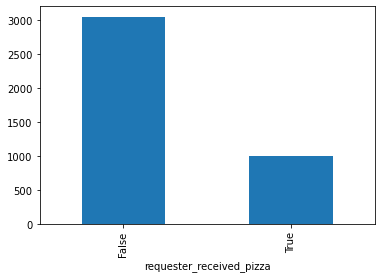

In [4]:
train_data.groupby('requester_received_pizza').size().plot(kind = "bar")
print(train_data.shape)
#For first 5 training examples, print the title of request
print('Baseline accuracy ', train_data[train_data['requester_received_pizza']==True].shape[0]/train_data.shape[0])

In [5]:
#For first 5 training examples, print the title of request
def display_request(num_examples=5):

    for i in range(num_examples):
        print(train_data.iloc[i]['request_title']) 
        print(train_data.iloc[i]['request_text'])
        print('Received Pizza: ', train_data.iloc[i]['requester_received_pizza']) 
        print('\n')  
        
display_request(5)

Request Colorado Springs Help Us Please
Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated
Received Pizza:  False


[Request] California, No cash and I could use some dinner
I spent the last money I had on gas today. Im broke until next Thursday :(
Received Pizza:  False


[Request] Hungry couple in Dundee, Scotland would love some pizza!
My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?
Received Pizza:  False


[Request] In Canada (Ontario), just got home from school. Need pizza.
It's cold, I'n hungr

## Pre-processing the Raw Text

In [6]:

#train_data['processed_request_text'] = train_data['request_text'].str.lower()
#train_data['processed_request_title'] = train_data['request_title'].str.lower()
train_data['request_text_count'] = train_data['request_text'].str.count(' ') + 1
#Check for null values
train_data.isnull().sum()
#Fill in null values
train_data['requester_user_flair'].fillna("",inplace=True)

print(train_data.shape)
train_data.head(10)

(4040, 33)


,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,request_text_count
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,[],0,1,0,1,,nickylvst,1317852607,1317849007,67
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,,fohacidal,1332652424,1332648824,16
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,[],0,3,0,3,,jacquibatman7,1319650094,1319646494,59
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,,4on_the_floor,1322855434,1322855434,29
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,,Futuredogwalker,1373657691,1373654091,102
5,N/A,3,4,0,t3_14gmeb,0,Feeling under the weather so I called out off ...,Feeling under the weather so I called out off ...,[REQUEST] I'll give a two week xbox live code ...,582.776586,...,"[AdviceAnimals, AskReddit, Autos, IAmA, Random...",234,533,814,1207,shroom,jamespweb,1354911700,1354911700,34
6,N/A,1,2,1342028318,t3_wcw5m,3,We're in Tampa Florida...moving to Ybor on Fri...,We're in Tampa Florida...moving to Ybor on Fri...,[Request] Help me give back to my roomies on F...,0.000000,...,[],0,16,0,28,,usftampa,1341969695,1341966095,203
7,N/A,2,6,0,t3_of16d,6,"(Request) I have given a few things on reddit,...","(Request) I have given a few things on reddit,...","random acts of pizza, i have a request, if not...",153.249560,...,"[AskReddit, IAmA, Music, Random_Acts_Of_Pizza,...",1153,14548,7055,35612,,thebraus,1326429793,1326429793,85
8,N/A,0,1,0,t3_1ioo1k,0,"Wasnt really sure what to put as the title, un...","Wasnt really sure what to put as the title, un...","[Request] Queensland Australia, Recently moved...",366.525625,...,"[AlisonBrie, AskReddit, Games, IAmA, Naruto, N...",189,253,331,475,,The__Doctor__,1374309042,1374305442,47
9,N/A,0,6,1,t3_k0l9j,21,"Austin, Texas\n\nMy two roommates and I are hu...","Austin, Texas\n\nMy two roommates and I are hu...",[REQUEST]We're in need of some om noms...,348.920428,...,[AskReddit],6,26,6,28,shroom,biffle,1314827982,1314824382,67


In [7]:
# separate minority and majority classes
negative = train_data[train_data.requester_received_pizza==0]
positive = train_data[train_data.requester_received_pizza==1]

# downsample majority
neg_downsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in minority class
 random_state=27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive, neg_downsampled])

# check new class counts
print('Resampled requester_received_pizza', downsampled.requester_received_pizza.value_counts())


print('training data shape:', downsampled.shape)
train_data = downsampled
# X_train = downsampled[feature_cols]
# Y_train = downsampled.requester_received_pizza
# X_train = X_train.drop(['requester_received_pizza'], axis=1)
# Y_test = X_test['requester_received_pizza']
# X_test = X_test.drop(['requester_received_pizza'], axis=1)
# Y = X['requester_received_pizza']
# X = X.drop(['requester_received_pizza'], axis=1)

# print('training data shape:', X_train.shape)
# print('training label shape:', Y_train.shape)

# print('test label shape:', X_test.shape)
# print('test label shape:', Y_test.shape)

Resampled requester_received_pizza True     994
False    994
Name: requester_received_pizza, dtype: int64
training data shape: (1988, 33)


## Resusable Functions

In [8]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

def text_preprocessor(text):
    text = text.lower()
    text = re.sub("\W",' ',text) # replace non-alphanumeric
    text = re.sub("_",' ',text) # replace non-alphanumeric
    text = re.sub('\n', '', text)
    text = re.sub('[0-9]', '', text)

    return text

### Word count Logistic Regression Model

(1988, 33)
accuracy = 0.545, precision = 0.552, recall = 0.545, f1 = 0.536


Text(0.5, 257.44, 'Predicted label')

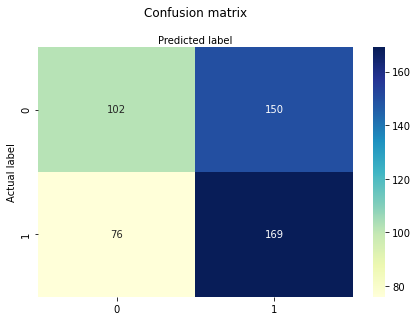

In [9]:
print(train_data.shape)
#Split training data into train and dev
X_train, X_test, y_train, y_test = train_test_split(np.array(train_data['request_text_count']).reshape(-1,1), train_data['requester_received_pizza'], test_size=0.25,random_state=0)

# Create and train model using train data
#class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.
logreg = LogisticRegression(class_weight='balanced') 
logreg.fit(X_train,y_train)
# Run model against test data
pred = logreg.predict(X_test)

# Look at confusion matrix

accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
cnf_matrix = metrics.confusion_matrix(y_test, pred, labels=[True, False])

#print(vectorizer.get_feature_names_out()[:20])

# Plot results
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Naive Bayes model with TfidfVectorizer


***  Naive Bayes model with TfidfVectorizer ***
accuracy = 0.614, precision = 0.614, recall = 0.614, f1 = 0.614


Text(0.5, 257.44, 'Predicted label')

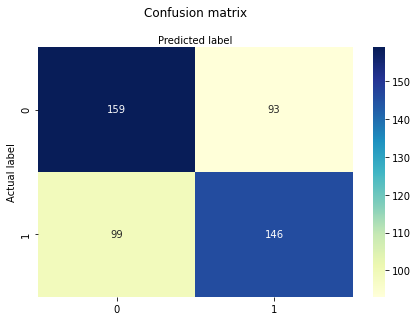

In [10]:



#Split training data into train and dev
X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

#Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score
print('\n***  Naive Bayes model with TfidfVectorizer ***') 

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), preprocessor=text_preprocessor)
train_vector = vectorizer.fit_transform(X_train)

dev_vector = vectorizer.transform(X_test)

mnb = MultinomialNB(alpha = 0.5)
mnb.fit(train_vector, y_train)

#Evaluate performance on the dev set.
pred_mnb = mnb.predict(dev_vector)

accuracy, precision, recall, f1 = get_metrics(y_test, pred_mnb)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
cnf_matrix = metrics.confusion_matrix(y_test, pred_mnb, labels=[True, False])

#print(vectorizer.get_feature_names_out()[:20])

# Plot results
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Review Logistic Regression with Reduced Vocab

L1 regularization -  C = 0.01, f1 score = 0.39419142592782974
L2 regularization - L1 reg strength = 0.01, L2 C = 0.5, f1 score = 0.32553813446718044, vocab size = 5

 
L1 regularization -  C = 0.1, f1 score = 0.5694956299850878
L2 regularization - L1 reg strength = 0.1, L2 C = 0.5, f1 score = 0.5690184700692235, vocab size = 60

 
L1 regularization -  C = 0.5, f1 score = 0.5924235774922172
L2 regularization - L1 reg strength = 0.5, L2 C = 0.5, f1 score = 0.6276490393572701, vocab size = 367

 
L1 regularization -  C = 1.0, f1 score = 0.6066304734399706
L2 regularization - L1 reg strength = 1.0, L2 C = 0.5, f1 score = 0.6176598049837486, vocab size = 565

 
L1 regularization -  C = 2.0, f1 score = 0.6113113656520373
L2 regularization - L1 reg strength = 2.0, L2 C = 0.5, f1 score = 0.6257090722472487, vocab size = 772

 
L1 regularization -  C = 10, f1 score = 0.6075219604036091
L2 regularization - L1 reg strength = 10, L2 C = 0.5, f1 score = 0.6237150357052132, vocab size = 1215

 
L1 r

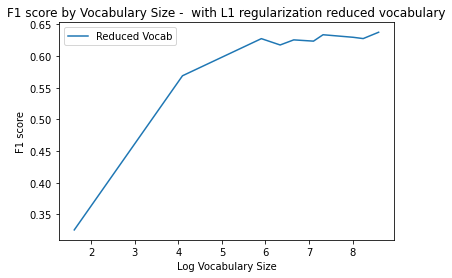

In [11]:
def Q6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    #Split training data into train and dev
    X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

    ### STUDENT START ###
    vectorizer = CountVectorizer() 
    vector = vectorizer.fit_transform(X_train)
    
     #transform dev data
    dev_vector = vectorizer.transform(X_test) 
    
    #print('Size of vocabulary: ', vector.shape[1])
    
    C_values  = [0.01,0.1,0.50,1.0,2.0,10,20,50,100,500]
    f_scores = []
    vocab_size = []

    for c in C_values:

        #print('Size of vocabulary: ', vector.shape[1])
        # L1 regularization
        lr1 = LogisticRegression(C=c, solver="liblinear",  multi_class="auto", penalty="l1", tol=.015)
        lr1.fit(vector, y_train)   
    
        pred_lr = lr1.predict(dev_vector)
    
        score = metrics.f1_score(y_test, pred_lr, average="weighted")
       
        vocab = vectorizer.vocabulary_

        print(f"L1 regularization -  C = {c}, f1 score = {score}")
        #print(lr1.coef_)
        nz_indx = np.sum(lr1.coef_, axis=0).nonzero()
 
        #Get the vocab to reduce
        vocab_reduce = vectorizer.get_feature_names_out()[nz_indx]

        #Use the non zero vocab to reduce
        #vectorizer2 = CountVectorizer(vocabulary=vocab_reduce)
        vectorizer2 = TfidfVectorizer(vocabulary=vocab_reduce, stop_words='english')
        vector2 = vectorizer2.fit_transform(X_train)

        #transform dev data
        dev_vector2 = vectorizer2.transform(X_test)  
    
        lr2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2", tol=.015 )
        lr2.fit(vector2, y_train)   
  
        pred_lr2 = lr2.predict(dev_vector2)
        score = metrics.f1_score(y_test, pred_lr2, average="weighted")

        vocab_dev2 = vectorizer2.vocabulary_
        f_scores.append(score)
        vocab_size.append(np.log(len(vocab_dev2)))
        print(f"L2 regularization - L1 reg strength = {c}, L2 C = 0.5, f1 score = {score}, vocab size =", len(vocab_dev2))

        print("\n ")
        
    plt.figure() 
    plt.plot(vocab_size, f_scores, label = "Reduced Vocab")
    plt.title('F1 score by Vocabulary Size -  with L1 regularization reduced vocabulary')
    plt.ylabel('F1 score')
    plt.xlabel('Log Vocabulary Size')
    plt.legend()
    
    plt.show()

    ### STUDENT END ###

Q6()



### Review Logistic Regression with Reduced Vocab

3901
(1491, 3901)
accuracy = 0.640, precision = 0.640, recall = 0.640, f1 = 0.640


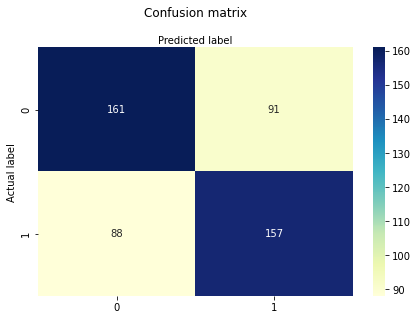

In [12]:
def LogisticRegressionWithReducedVocab():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    #Split training data into train and dev
    X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

    ### STUDENT START ###
    vectorizer = CountVectorizer() 
    vector = vectorizer.fit_transform(X_train)
    
     #transform dev data
    dev_vector = vectorizer.transform(X_test) 

    # L1 regularization
    lr1 = LogisticRegression(C=100, solver="liblinear",  multi_class="auto", penalty="l1", tol=.015)
    lr1.fit(vector, y_train)   

    pred_lr = lr1.predict(dev_vector)

    score = metrics.f1_score(y_test, pred_lr, average="weighted")

    vocab = vectorizer.vocabulary_

    #print(lr1.coef_)
    nz_indx = np.sum(lr1.coef_, axis=0).nonzero()

    #Get the vocab to reduce
    vocab_reduce = vectorizer.get_feature_names_out()[nz_indx]
    print(len(vocab_reduce))
    #Use the non zero vocab to reduce
    #vectorizer2 = CountVectorizer(vocabulary=vocab_reduce)
    vectorizer2 = TfidfVectorizer(vocabulary=vocab_reduce, stop_words='english')
    vector2 = vectorizer2.fit_transform(X_train)

    #transform dev data
    dev_vector2 = vectorizer2.transform(X_test)  
    print(vector2.shape)
    
    lr2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2", tol=.015 )
    lr2.fit(vector2, y_train)   
    pred = lr2.predict(dev_vector2)

#     mnb = MultinomialNB(alpha = 0.5)
#     mnb.fit(vector2, y_train)
#     #Evaluate performance on the dev set.
#     pred = mnb.predict(dev_vector2)
    
    accuracy, precision, recall, f1 = get_metrics(y_test, pred)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

    
    cnf_matrix = metrics.confusion_matrix(y_test, pred, labels=[True, False])

    #print(vectorizer.get_feature_names_out()[:20])

    # Plot results
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    ### STUDENT END ###

LogisticRegressionWithReducedVocab()


### Review Naive Bayes with Reduced Vocab

3901
(1491, 3901)
accuracy = 0.652, precision = 0.655, recall = 0.652, f1 = 0.650


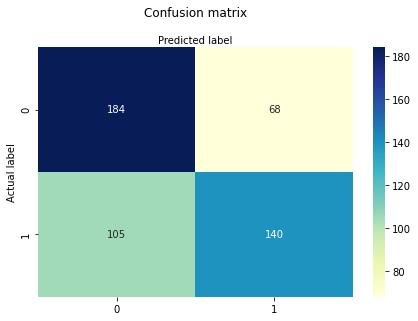

In [13]:
def MultinomialNBWithReducedVocab():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    #Split training data into train and dev
    X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

    ### STUDENT START ###
    vectorizer = CountVectorizer() 
    vector = vectorizer.fit_transform(X_train)
    
     #transform dev data
    dev_vector = vectorizer.transform(X_test) 

    # L1 regularization
    lr1 = LogisticRegression(C=100, solver="liblinear",  multi_class="auto", penalty="l1", tol=.015)
    lr1.fit(vector, y_train)   

    pred_lr = lr1.predict(dev_vector)

    score = metrics.f1_score(y_test, pred_lr, average="weighted")

    vocab = vectorizer.vocabulary_

    #print(lr1.coef_)
    nz_indx = np.sum(lr1.coef_, axis=0).nonzero()

    #Get the vocab to reduce
    vocab_reduce = vectorizer.get_feature_names_out()[nz_indx]
    print(len(vocab_reduce))
    #Use the non zero vocab to reduce
    #vectorizer2 = CountVectorizer(vocabulary=vocab_reduce)
    vectorizer2 = TfidfVectorizer(vocabulary=vocab_reduce, stop_words='english')
    vector2 = vectorizer2.fit_transform(X_train)

    #transform dev data
    dev_vector2 = vectorizer2.transform(X_test)  
    print(vector2.shape)
    
    mnb = MultinomialNB(alpha = 0.5)
    mnb.fit(vector2, y_train)
    #Evaluate performance on the dev set.
    pred = mnb.predict(dev_vector2)
    
    accuracy, precision, recall, f1 = get_metrics(y_test, pred)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

    
    cnf_matrix = metrics.confusion_matrix(y_test, pred, labels=[True, False])

    #print(vectorizer.get_feature_names_out()[:20])

    # Plot results
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    ### STUDENT END ###

MultinomialNBWithReducedVocab()


### LogisticRegression using Pipeline

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

#Split training data into train and dev
X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(pred, y_test))
accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy 0.641851106639839
accuracy = 0.642, precision = 0.642, recall = 0.642, f1 = 0.641


### SGDClassifier using Pipeline

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
#Split training data into train and dev
X_train, X_test, y_train, y_test = train_test_split(train_data['request_text'], train_data['requester_received_pizza'], test_size=0.25,random_state=0)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(pred, y_test))
accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy 0.6257545271629779
accuracy = 0.626, precision = 0.626, recall = 0.626, f1 = 0.626
